<a href="https://colab.research.google.com/github/laurafoes/extensao--python-pandas/blob/main/projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# utilizando https://www.kaggle.com/datasets/zynicide/wine-reviews?resource=download winemag-data_first150k.csv para analise
df = pd.read_csv('/content/winemag-data_first150k.csv')
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
6,6,Spain,Slightly gritty black-fruit aromas include a s...,San Román,95,65.0,Northern Spain,Toro,NaN,Tinta de Toro,Maurodos
7,7,Spain,Lush cedary black-fruit aromas are luxe and of...,Carodorum Único Crianza,95,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm


In [9]:
df.shape

(150930, 11)

In [10]:
# Dropar a coluna index importada do csv
df = df.drop(columns = 'Unnamed: 0')
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [11]:
df.shape

(150930, 10)

In [12]:
df.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [13]:
# Ver quantos NaN existem
df_nan_count = df.isna().sum()
print(df_nan_count)

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


In [14]:
# Quase 14 mil valores de preço sem classificação (NaN). Tirar uma média agrupada por país e região depois.
# Nomenclatura: df_price
df_price = df.dropna(subset = ['country']) # Foi dropado pois eram apenas 5 valores
df_price.isna().sum()
print(df_price.isna().sum())

country            0
description        0
designation    45735
points             0
price          13695
province           0
region_1       25055
region_2       89972
variety            0
winery             0
dtype: int64


In [15]:
# Substituir os NaN de region_1 e region_2 por vazio
# Impossível dropar pois ia perder muitas linhas
df_price[['region_1', 'region_2']] = df_price[['region_1', 'region_2']].fillna('no value')
df_price.isna().sum()
print(df_price.isna().sum())

country            0
description        0
designation    45735
points             0
price          13695
province           0
region_1           0
region_2           0
variety            0
winery             0
dtype: int64


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
# Fazer agrupamentos para preencher os preços 
# Agrupamento por: country, region_1, region_2, variety e winery. 
print(f"Max Wine Price = {max(df['price'])}")
print(f"Min Wine Price = {min(df['price'])}")

Max Wine Price = 2300.0
Min Wine Price = 4.0


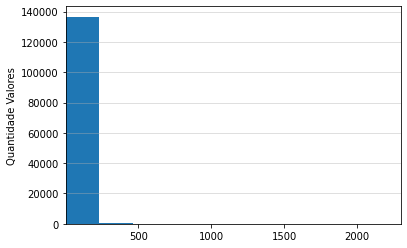

In [17]:
# Analisar os preços para ver sua distribuição. Com isso será decidido entre média ou mediana pra preencher os preços ausentes.

plt.hist(df_price['price'])
plt.xlim(min(df_price['price']), max(df_price['price']))
plt.grid(axis='y', alpha=0.5)
plt.ylabel('Quantidade Valores')
plt.show()

In [18]:
# Visto que há um valor de $2300, será utilizada a MEDIANA para preencher os preços ausentes. A Média deslocaria os valores

df_price[['country', 'region_1', 'region_2', 'variety', 'winery','points', 'price']].sort_values(['points', 'price'], ascending = [False, False])

,country,region_1,region_2,variety,winery,points,price
26296,France,Champagne,no value,Chardonnay,Krug,100,1400.0
51886,France,Champagne,no value,Chardonnay,Krug,100,1400.0
83536,France,Champagne,no value,Chardonnay,Krug,100,1400.0
2145,France,Pessac-Léognan,no value,Bordeaux-style White Blend,Château Haut-Brion,100,848.0
24151,Italy,Toscana,no value,Merlot,Tenuta dell'Ornellaia,100,460.0
...,...,...,...,...,...,...,...
135212,US,Paso Robles,Central Coast,Red Blend,Four Vines,80,NaN
137020,Portugal,no value,no value,Port,Casal dos Jordões,80,NaN
141915,Argentina,Maipú,no value,Merlot,Pascual Toso,80,NaN
142696,France,Vin de Pays d'Oc,no value,Chardonnay-Sauvignon,Pierre Besinet,80,NaN


ANALISES GRAFICAS

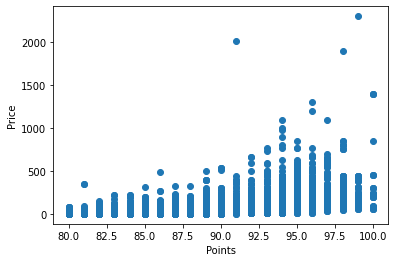

In [19]:
# Gráfico preço x pontuação
fig, ax = plt.subplots()
y = df_price['price']
ax.set_ylabel('Price')

x = df_price['points']
ax.set_xlabel('Points')
ax.scatter(x,y)
plt.show()

In [20]:
# Relação etnre pais e media de preços dos vinhos registrados
table = pd.pivot_table(df_price, values='price', 
                                index=['country'],
                                aggfunc=np.mean)
table

,price
country,
Albania,20.000000
Argentina,20.794881
Australia,31.258480
Austria,31.192106
Bosnia and Herzegovina,12.750000
Brazil,19.920000
Bulgaria,11.545455
Canada,34.628866
Chile,19.344780


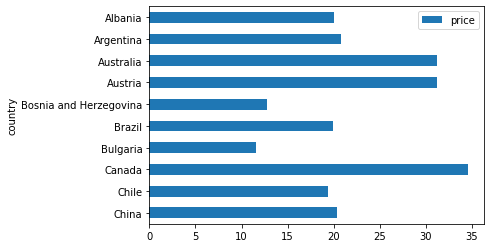

In [21]:
# Grafico de média de preço x país dos 10 primeiros países
table = table.head(10)
ax = table.plot(kind = 'barh')
ax.invert_yaxis()